# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




### Question 1 - Feature Engineering (5 points)

In this step you outline the following as potential features (this is a limited example - we can have many features as in your programming exercise below). 

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1|\mathbf{x},\mathbf{w}) = \frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x})}$$

$$p(y=0|\mathbf{x},\mathbf{w}) = 1 - p(y=1|\mathbf{x},\mathbf{w}) = 1 - \frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x})}$$



### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.





$$Since:$$
$$p(y=1|\mathbf{x},\mathbf{w}) + p(y=0|\mathbf{x},\mathbf{w}) = 1$$

$$Then:$$
$$\sigma(\mathbf{w}^T\mathbf{x}) = \frac{1}{2}$$

$$So:$$
$$\mathbf{w}^T\mathbf{x}=0$$



### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



$$L{CE} = -\frac{1}{m} * \sum{i=1}^m y{i}*log(σ(w^Tx{i}))+(1-y{i})*log(1-σ(w^Tx{i})$$



### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



$$\nabla_w L_{CE} = \frac{1}{m} \sum_{i=1}^m \nabla_w l(y_i, \hat{y}^i)$$





### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



The accuracy will be affect by the imbalance. If p(y=0) is significantly larger the model will bias itself towards predicting that as it's data points. Given this imbalance the model should be able to predict the majority class accurately p(y=0) but the minority class inacurrately p(y=1). Given this accuracy may be high but it is not a good metric to evaluate the model. 


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



Best hyperparameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant'}
F1 score: 0.5268176172733352


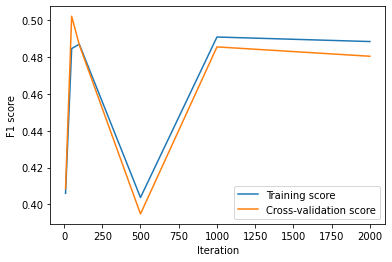

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("https://query.data.world/s/hjk3fzrxfshphohwzgnve72r6ntout")
data = data.apply(lambda x: pd.factorize(x)[0])

# Split the data into training and testing sets using train_test_split()
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(["ID", "PARASITE_STATUS"], axis=1),
    data["PARASITE_STATUS"],
    test_size=0.2,
    stratify=data["PARASITE_STATUS"],
    random_state=42,
)

# Set up of a dictionary of hyperparameters to be tuned using GridSearchCV
#alpha: regularization strength
#eat0: learning rate
#learning rate: update rules for learning rate
p_grid = {
    'alpha': [1e-05, 1e-04, 1e-03], 
    'eta0': [0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}

# Initialization of the Stochastic Gradient Descent classifier
classifier = SGDClassifier(loss='log')

# Use GridSearchCV to find the best hyperparameters
#CV: number of folds in the cross-validation process
#Scoring: specifies the evaluation metric
g_search = GridSearchCV(classifier, param_grid=p_grid, cv=5, scoring='f1_macro')
g_search.fit(x_train, y_train)

# Get the best hyperparameters and test F1 score
best_classifier = g_search.best_estimator_
y_pred = best_classifier.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
print('Best hyperparameters:', g_search.best_params_)
print('F1 score:', f1)

# Plot the training and cross-validation F1 scores
iteration_range = [10, 50, 100, 500, 1000, 2000]
train_scores, test_scores = validation_curve(
    best_classifier, x_train, y_train, param_name='max_iter', param_range=iteration_range,
    scoring='f1_macro', cv=5
)
plt.plot(iteration_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(iteration_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Iteration')
plt.ylabel('F1 score')
plt.legend()
plt.show()
